# 0. Data gathering

Description of a version 0 dataset:
* 100 images total, 75 training and 25 testing
* Images of the catan circles that represent numbers at various angles and lighting
* There are 10 numbers in total, so there needs to be 10 images of each number
* This dataset will be without data augmentation
* Various background, including a catan board and close up of the number
* The goal is to train a model on this dataset that will eventually take in cropped out images of the numbers of a Catan board and identify which number it is

# 1. Create a zip file of the images for importing

After images are collected, I'll create a zip file and put it on the Github Repository: https://github.com/mattmanb/catanomics/tree/main
* This zip file will have the correct directory paths set up (the data will already be divided into train and test sets, as well as what number they will fall under)
* i.e. "data/CATANIST/train/four" will contain all training images of the number four
* Each training class should have a minimum of 7 images of that number (if the data is divided completely randomly then there is a chance a number's images are too skewed to the test directory and the model won't be able to sufficiently learn the number's patterns)

## 1.1 This script was used to create the condensed zip file that holds the dataset
* The zip file before was 233MB since each image was 3024x3024 (thanks Apple!)
* I resized all the images to 224x224, saved it to a 'condensed' directory, then made a zip file from there. No need to keep this code included, so I'll comment it out.

In [1]:
# Resize all the images in the dataset so a zip file < 25MB can be made
import cv2
import os

def resize_images(root_dir, target_dir, new_width, new_height):
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            # Construct the full file path
            file_path = os.path.join(subdir, file)
            # Read the image
            image = cv2.imread(file_path)
            if image is not None:
                # Resize the image
                resized_image = cv2.resize(image, (new_width, new_height))

                # Construct relative path to maintain the directory structure
                relative_path = os.path.relpath(subdir, root_dir)
                target_subdir = os.path.join(target_dir, relative_path)

                # Ensure the target subdirectory exists
                if not os.path.exists(target_subdir):
                    os.makedirs(target_subdir)

                # Construct the target file path to save the image
                target_file_path = os.path.join(target_subdir, file)
                cv2.imwrite(target_file_path, resized_image)
                print(f"Resized image saved to {target_file_path}")
            else:
                print(f"Failed to read {file_path}")

In [2]:
# Create new folder
root_dir = './data/CATANIST V1'
target_dir = './condensed/CATANIST V1'
new_width = 224
new_height = 224

resize_images(root_dir, target_dir, new_width, new_height)

Resized image saved to ./condensed/CATANIST V1\test\eight\Photo Feb 28 2024, 09 54 02.jpg
Resized image saved to ./condensed/CATANIST V1\test\eight\Photo Feb 28 2024, 09 54 09.jpg
Resized image saved to ./condensed/CATANIST V1\test\eight\Photo Feb 28 2024, 09 54 16.jpg
Resized image saved to ./condensed/CATANIST V1\test\eleven\Photo Feb 28 2024, 09 58 18.jpg
Resized image saved to ./condensed/CATANIST V1\test\eleven\Photo Feb 28 2024, 09 58 22.jpg
Resized image saved to ./condensed/CATANIST V1\test\eleven\Photo Feb 28 2024, 09 58 29.jpg
Resized image saved to ./condensed/CATANIST V1\test\five\Photo Feb 28 2024, 09 50 22.jpg
Resized image saved to ./condensed/CATANIST V1\test\five\Photo Feb 28 2024, 09 50 29.jpg
Resized image saved to ./condensed/CATANIST V1\test\five\Photo Feb 28 2024, 09 50 36.jpg
Resized image saved to ./condensed/CATANIST V1\test\four\Photo Feb 28 2024, 09 48 56.jpg
Resized image saved to ./condensed/CATANIST V1\test\four\Photo Feb 28 2024, 09 49 02.jpg
Resized imag

## 1.2 Importing the zip file from the github repos and saving it to data directory

In [3]:
import requests
import zipfile
from pathlib import Path
import tqdm

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "CATANIST V1"

# Download CATANIST dataset
if image_path.is_dir():
  print(f"{image_path} already exists, skipping download...")
else:
  with open(data_path / "CATANIST.zip", "wb") as f:
    request = requests.get("https://github.com/mattmanb/catanomics/raw/main/data/CATANIST%20V1%20.zip")
    print(f"Downloading CATANIST zip file...")
    f.write(request.content)

  # Unzip CATANIST dataset
  with zipfile.ZipFile(data_path / "CATANIST.zip", "r") as zip_ref:
    print("Unzipping CATANIST data...")
    zip_ref.extractall(data_path)

data\CATANIST already exists, skipping download...


# 2. Set up train/test directories and get a list of all the file paths (Data preparation)

* Create training/testing directories
* Visualize some of the images at random from the training directory

### 2.1 Examine the data directory

In [4]:
# Examine 
import os
def walk_through_dir(dir_path):
    """Walks through dir_path, returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data\CATANIST
There are 10 directories and 0 images in data\CATANIST\test
There are 0 directories and 3 images in data\CATANIST\test\eight
There are 0 directories and 3 images in data\CATANIST\test\eleven
There are 0 directories and 3 images in data\CATANIST\test\five
There are 0 directories and 3 images in data\CATANIST\test\four
There are 0 directories and 3 images in data\CATANIST\test\nine
There are 0 directories and 3 images in data\CATANIST\test\six
There are 0 directories and 3 images in data\CATANIST\test\ten
There are 0 directories and 3 images in data\CATANIST\test\three
There are 0 directories and 3 images in data\CATANIST\test\twelve
There are 0 directories and 3 images in data\CATANIST\test\two
There are 10 directories and 0 images in data\CATANIST\train
There are 0 directories and 7 images in data\CATANIST\train\eight
There are 0 directories and 7 images in data\CATANIST\train\eleven
There are 0 directories and 7 images in data\CATA

### 2.2 Create train and test paths

In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/CATANIST/train'), WindowsPath('data/CATANIST/test'))

## 2.3 Visualize some of the images

In [7]:
image_path

WindowsPath('data/CATANIST')

Lucky image to be visualized: data\CATANIST\train\four\Photo Feb 28 2024, 09 47 07.jpg
Class of the random image: four
Image path: data\CATANIST\train\four\Photo Feb 28 2024, 09 47 07.jpg
Image class: four
Image height: 224
Image width: 224


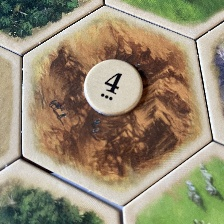

In [8]:
import random
from PIL import Image

# Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)
print(f"Lucky image to be visualized: {random_image_path}")

# Get the image class from the path name (the name of the directory)
random_image_class = random_image_path.parent.stem
print(f"Class of the random image: {random_image_class}")

# Open the image using PIL
img = Image.open(random_image_path)

# Print the metadata
print(f"Image path: {random_image_path}")
print(f"Image class: {random_image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(-0.5, 223.5, 223.5, -0.5)

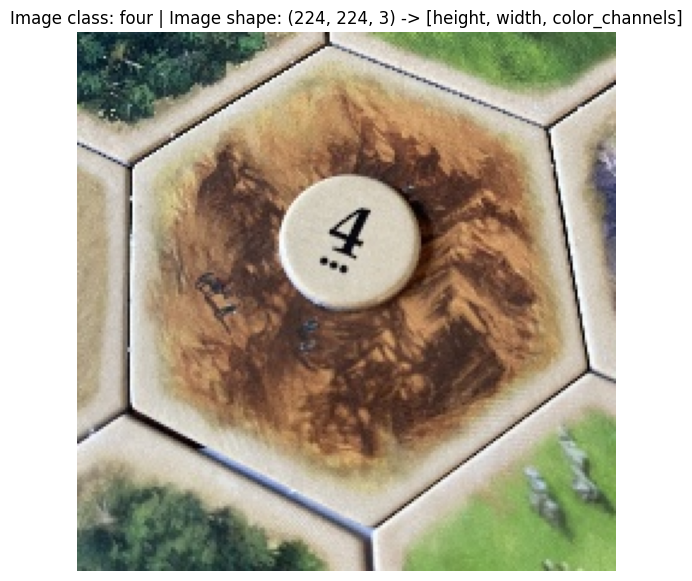

In [9]:
# Visualize with matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Turn the image into an numpy array
img_as_array = np.asarray(img)

# Plot the image w/ matplotlib
plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image class: {random_image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

# 3. Tranforming the data for the model

In order to use these images with a PyTorch model, they need to be transformed...
* The resolution can be much lower than the quality iPhones default to
* No data augmentation in the first iteration of the dataset
* Then the images must be put into Tensor format that will work with PyTorch
* Visualize images using matplotlib (`.permute()` needs to be used so that color channels come last!)

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 3.1 Transform the data with torchvision.transforms

In [11]:
# Transform for the image
data_transform = transforms.Compose([
    # No resize need right now
    transforms.Resize(size=(224, 224)),
    # Turn the image into a torch tensor
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
])

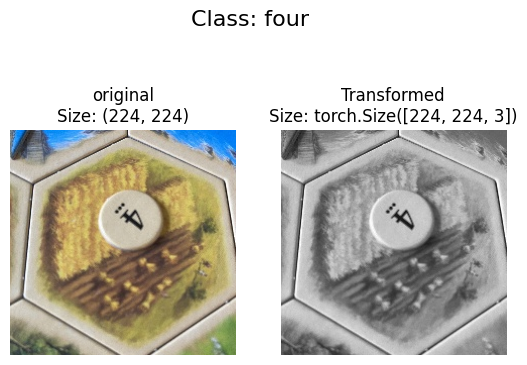

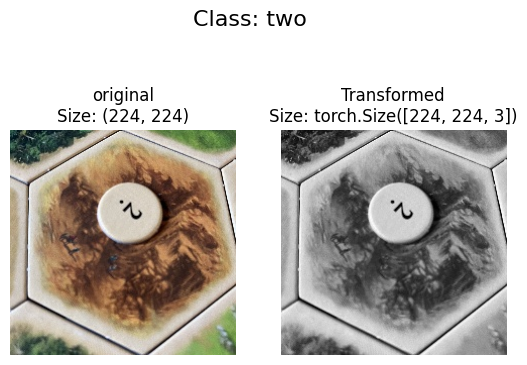

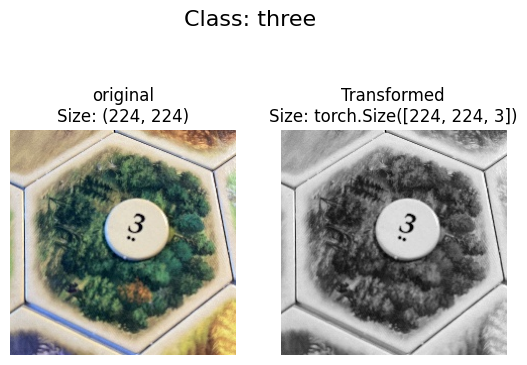

In [12]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """
    Selects random images from a path of images and loads/transforms them; 
    then plots the original vs. the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform and plot the target image
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list, transform=data_transform, n=3, seed=None)

# 4. Load image data using `ImageFolder` from `torchvision.datasets`, and create DataLoaders

This performs the transforms previously created and loads the images into ImageFolder data variables

Then create DataLoaders from the train/test ImageFolder variables

### 4.1 Create datasets using ImageFolder

In [13]:
train_dir, test_dir

(WindowsPath('data/CATANIST/train'), WindowsPath('data/CATANIST/test'))

In [14]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 70
     Root location: data\CATANIST\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                Grayscale(num_output_channels=3)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 30
     Root location: data\CATANIST\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                Grayscale(num_output_channels=3)
                ToTensor()
            ))

In [15]:
class_names = train_data.classes
class_names

['eight',
 'eleven',
 'five',
 'four',
 'nine',
 'six',
 'ten',
 'three',
 'twelve',
 'two']

In [16]:
len(train_data), len(test_data)

(70, 30)

In [17]:
# Index on the train_data Dataset to get a single image and label
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4275, 0.4431, 0.4000,  ..., 0.3882, 0.5255, 0.3569],
         [0.4157, 0.4078, 0.3412,  ..., 0.3961, 0.5216, 0.4471],
         [0.3765, 0.3882, 0.3255,  ..., 0.4157, 0.4980, 0.5373],
         ...,
         [0.2196, 0.1725, 0.2000,  ..., 0.6392, 0.6471, 0.6824],
         [0.2863, 0.2706, 0.2627,  ..., 0.6039, 0.6471, 0.6627],
         [0.3176, 0.3059, 0.2627,  ..., 0.5725, 0.6549, 0.6588]],

        [[0.4275, 0.4431, 0.4000,  ..., 0.3882, 0.5255, 0.3569],
         [0.4157, 0.4078, 0.3412,  ..., 0.3961, 0.5216, 0.4471],
         [0.3765, 0.3882, 0.3255,  ..., 0.4157, 0.4980, 0.5373],
         ...,
         [0.2196, 0.1725, 0.2000,  ..., 0.6392, 0.6471, 0.6824],
         [0.2863, 0.2706, 0.2627,  ..., 0.6039, 0.6471, 0.6627],
         [0.3176, 0.3059, 0.2627,  ..., 0.5725, 0.6549, 0.6588]],

        [[0.4275, 0.4431, 0.4000,  ..., 0.3882, 0.5255, 0.3569],
         [0.4157, 0.4078, 0.3412,  ..., 0.3961, 0.5216, 0.4471],
         [0.3765, 0.3882, 0.3255,  ..., 0.41

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute: torch.Size([224, 224, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'eight')

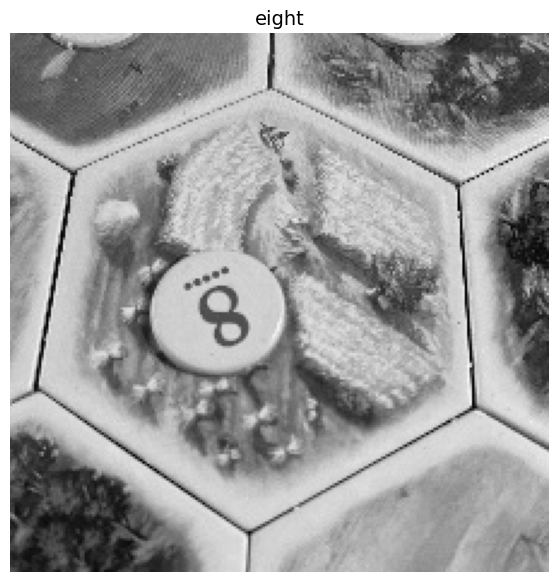

In [18]:
# Rearrange the order of the dimensions
img_permute = img.permute(1, 2 , 0)

# Print out different shapes
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis(False)
plt.title(class_names[label], fontsize=14)

### 4.2 Create `DataLoader`'s for the datasets

In [19]:
import os
os.cpu_count()

6

In [20]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
NUM_WORKERS = os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                                batch_size=BATCH_SIZE,
                                # num_workers=NUM_WORKERS,
                                shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              # num_workers=NUM_WORKERS,
                              shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x22fa57b06d0>,
 <torch.utils.data.dataloader.DataLoader at 0x22fa5975310>)

In [21]:
len(train_dataloader), len(test_dataloader)

(70, 30)

In [22]:
img, label = next(iter(train_dataloader))

# Batch size is 1
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


# 5. Perform any other transforms

This is the step where any other transformations, such as data augmentation, would take place. 

Possible data augmentations for this dataset:
* TrivialAugment - https://pytorch.org/vision/main/generated/torchvision.transforms.TrivialAugmentWide.html
* Vertical Flip - https://pytorch.org/vision/stable/generated/torchvision.transforms.RandomVerticalFlip.html

# 6. Create a model

Find a model architecture that works well with MNIST and try that, then experiment from there.
* This step will require many different attempts to try to become the most accurate, prevent underfitting/overfitting, and determine other issues with the dataset
* Use `torchinfo` to visualize the learning process
* Functionize training, testing, and evaluation for future models

### 6.1 Create transform, ImageFolders, and DataLoaders if something different is being attempted, otherwise skip here

### 6.2 Create a simple model class

In [56]:
import torch
from torch import nn

# Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer: https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Default stride in a MaxPool2d layer is the kernel size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # Default stride in a MaxPool2d layer is the kernel size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*53*53, # this layer was determined by printing out shapes of previous layer in section 6.3
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"x shape after conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"x shape after conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"x shape after classifier: {x.shape}")
    return x

In [58]:
len(class_names)

10

In [59]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=10, bias=True)
  )
)

### 6.3 Try a forward pass on a single image (to test the model)

In [60]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([1, 3, 224, 224]), torch.Size([1]))

In [61]:
model_0(image_batch.to(device))

tensor([[ 0.0326,  0.0106, -0.0094, -0.0641,  0.0055,  0.0621,  0.0073, -0.0517,
          0.0227,  0.0073]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 6.4 Use torchinfo to examine model

In [62]:
# torchinfo stuff
import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 224, 224])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 110, 110]         --
│    └─Conv2d: 2-1                       [1, 10, 222, 222]         280
│    └─ReLU: 2-2                         [1, 10, 222, 222]         --
│    └─Conv2d: 2-3                       [1, 10, 220, 220]         910
│    └─ReLU: 2-4                         [1, 10, 220, 220]         --
│    └─MaxPool2d: 2-5                    [1, 10, 110, 110]         --
├─Sequential: 1-2                        [1, 10, 53, 53]           --
│    └─Conv2d: 2-6                       [1, 10, 108, 108]         910
│    └─ReLU: 2-7                         [1, 10, 108, 108]         --
│    └─Conv2d: 2-8                       [1, 10, 106, 106]         910
│    └─ReLU: 2-9                         [1, 10, 106, 106]         --
│    └─MaxPool2d: 2-10                   [1, 10, 53, 53]           --
├─Sequentia

### 6.5 Create a train and test loop function

In [63]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and accuracy values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return { "model_name": model.__class__.__name__, # only works when model was created with a class
           "model_loss": loss.item(),
           "model_acc": acc}

In [64]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [65]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 6.6 Train the model by creating a train() function that combines train_step() and test_step()

In [66]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [78]:
EPOCHS = 25

model_0 = TinyVGG(input_shape=3,
                  hidden_units=25,
                  output_shape=len(train_dataloader)).to(device)

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/25 [00:00<?, ?it/s]

  4%|▍         | 1/25 [00:00<00:18,  1.30it/s]

Epoch: 1 | train_loss: 3.1530 | train_acc: 0.0429 | test_loss: 2.3979 | test_acc: 0.1000


  8%|▊         | 2/25 [00:01<00:15,  1.53it/s]

Epoch: 2 | train_loss: 2.4534 | train_acc: 0.0571 | test_loss: 2.3576 | test_acc: 0.1000


 12%|█▏        | 3/25 [00:01<00:13,  1.64it/s]

Epoch: 3 | train_loss: 2.4667 | train_acc: 0.0571 | test_loss: 2.3499 | test_acc: 0.1000


 16%|█▌        | 4/25 [00:02<00:12,  1.70it/s]

Epoch: 4 | train_loss: 2.4157 | train_acc: 0.0714 | test_loss: 2.3343 | test_acc: 0.1000


 20%|██        | 5/25 [00:03<00:11,  1.74it/s]

Epoch: 5 | train_loss: 2.4254 | train_acc: 0.0286 | test_loss: 2.3200 | test_acc: 0.1000


 24%|██▍       | 6/25 [00:03<00:10,  1.75it/s]

Epoch: 6 | train_loss: 2.3848 | train_acc: 0.0857 | test_loss: 2.3182 | test_acc: 0.1000


 28%|██▊       | 7/25 [00:04<00:10,  1.76it/s]

Epoch: 7 | train_loss: 2.3910 | train_acc: 0.0429 | test_loss: 2.3141 | test_acc: 0.1000


 32%|███▏      | 8/25 [00:04<00:09,  1.78it/s]

Epoch: 8 | train_loss: 2.3936 | train_acc: 0.0571 | test_loss: 2.4667 | test_acc: 0.1000


 36%|███▌      | 9/25 [00:05<00:08,  1.78it/s]

Epoch: 9 | train_loss: 2.3933 | train_acc: 0.0429 | test_loss: 2.3060 | test_acc: 0.0667


 40%|████      | 10/25 [00:05<00:08,  1.79it/s]

Epoch: 10 | train_loss: 1.9904 | train_acc: 0.3714 | test_loss: 2.8841 | test_acc: 0.1667


 44%|████▍     | 11/25 [00:06<00:07,  1.79it/s]

Epoch: 11 | train_loss: 0.5664 | train_acc: 0.9000 | test_loss: 4.7430 | test_acc: 0.1333


 48%|████▊     | 12/25 [00:06<00:07,  1.74it/s]

Epoch: 12 | train_loss: 0.0712 | train_acc: 0.9857 | test_loss: 8.9390 | test_acc: 0.2000


 52%|█████▏    | 13/25 [00:07<00:06,  1.73it/s]

Epoch: 13 | train_loss: 0.0016 | train_acc: 1.0000 | test_loss: 9.1105 | test_acc: 0.2000


 56%|█████▌    | 14/25 [00:08<00:06,  1.74it/s]

Epoch: 14 | train_loss: 0.0006 | train_acc: 1.0000 | test_loss: 9.3700 | test_acc: 0.2000


 60%|██████    | 15/25 [00:08<00:05,  1.71it/s]

Epoch: 15 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 9.5385 | test_acc: 0.2000


 64%|██████▍   | 16/25 [00:09<00:05,  1.73it/s]

Epoch: 16 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 9.6113 | test_acc: 0.2000


 68%|██████▊   | 17/25 [00:09<00:04,  1.74it/s]

Epoch: 17 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 9.7640 | test_acc: 0.2000


 72%|███████▏  | 18/25 [00:10<00:04,  1.75it/s]

Epoch: 18 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 9.8396 | test_acc: 0.2000


 76%|███████▌  | 19/25 [00:10<00:03,  1.76it/s]

Epoch: 19 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 9.9157 | test_acc: 0.2000


 80%|████████  | 20/25 [00:11<00:02,  1.76it/s]

Epoch: 20 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 10.0201 | test_acc: 0.2000


 84%|████████▍ | 21/25 [00:12<00:02,  1.77it/s]

Epoch: 21 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 10.0857 | test_acc: 0.2000


 88%|████████▊ | 22/25 [00:12<00:01,  1.77it/s]

Epoch: 22 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 10.1201 | test_acc: 0.2000


 92%|█████████▏| 23/25 [00:13<00:01,  1.76it/s]

Epoch: 23 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 10.1798 | test_acc: 0.2000


 96%|█████████▌| 24/25 [00:13<00:00,  1.67it/s]

Epoch: 24 | train_loss: 0.0001 | train_acc: 1.0000 | test_loss: 10.1703 | test_acc: 0.2000


100%|██████████| 25/25 [00:14<00:00,  1.73it/s]

Epoch: 25 | train_loss: 0.0000 | train_acc: 1.0000 | test_loss: 9.6201 | test_acc: 0.2000
Total training time: 14.491 seconds


In [79]:
model_0_results

{'train_loss': [3.1529876283236913,
  2.4534050328390937,
  2.4667087163243977,
  2.415702264649527,
  2.425422830241067,
  2.384799860204969,
  2.3910300833838325,
  2.3936104467936925,
  2.3932520968573434,
  1.9903610802122524,
  0.5663659439924676,
  0.07124331480626438,
  0.0016091381584672603,
  0.0005930275393987066,
  0.0003760726846880605,
  0.00026606659534828784,
  0.0002193456116624962,
  0.00016100512000239827,
  0.0001316728088641282,
  0.00011150601358157327,
  9.412705952809932e-05,
  8.080282526533113e-05,
  6.89691219577071e-05,
  5.9961918903387156e-05,
  2.6785639260497515e-05],
 'train_acc': [0.04285714285714286,
  0.05714285714285714,
  0.05714285714285714,
  0.07142857142857142,
  0.02857142857142857,
  0.08571428571428572,
  0.04285714285714286,
  0.05714285714285714,
  0.04285714285714286,
  0.37142857142857144,
  0.9,
  0.9857142857142858,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'test_loss': [2.3979406793912

# 7. Plot loss curves

This step is crucial in improving the results during step 6
* Plot different model performance against one another
* Visualize model performance
* Functionize plotting and plotting two models against one another

### 7.1 Plot the loss curves of Model 0

In [80]:
from typing import Tuple, Dict, List

In [81]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """Plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy of the results
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Figure out number of epochs
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

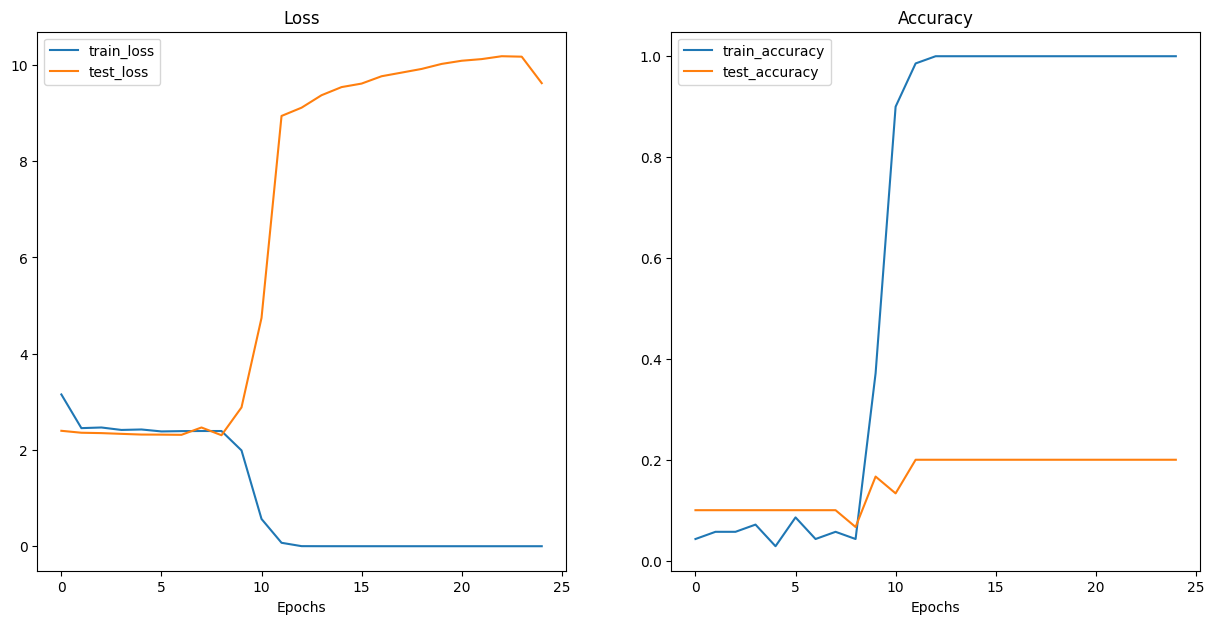

In [82]:
plot_loss_curves(model_0_results)

# 8. Test model with custom images

Take new images and send them through the model
* Functionize model predictions and plot the prediction along with the image
* Take new images to see how the model does with new images

In [68]:
import cv2
import numpy as np
import torch

In [69]:
# Show image function for later use
def showImage(img, name=None):
    if not name:
        cv2.imshow("Image display", img)
    else:
        cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
# Save image function
def saveImage(filename, img, dir):
    # Get full path
    full_path = f"{dir}/{filename}"
    cv2.imwrite(full_path, img)
    print(f"Image saved to {full_path}")

In [70]:
import os
from PIL import Image

images = []
for filename in os.listdir("./data/CATANIST dataset"):
    file_path = os.path.join("./data/CATANIST dataset", filename)
    try:
        img = Image.open(file_path)
        images.append(img)
    except IOError:
        print(f"Error opening or reading image {filename}")
        
for img in images:
    print(img)
    showImage(img)

FileNotFoundError: [WinError 3] The system cannot find the path specified: './data/CATANIST dataset'